Working through chapter 5 exercise 8

Train a linearly separable data set using:
* LinearSVC
* SVC
* SGDClassifier with a SVM

### Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

In [2]:
pd.set_option('max_rows', 7)
pd.set_option('max_columns', 50)

%matplotlib inline
plt.style.use('fivethirtyeight')

### Data

In [3]:
# Use subset of iris data as linearly separable data set
iris = datasets.load_iris()

target_names = pd.DataFrame(iris.target_names, columns=['name'])

iris = pd.DataFrame(np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

iris_subset = iris.loc[iris['target'].isin([0, 1]), 
                       ['petal length (cm)', 'petal width (cm)', 'target']]

iris_subset.rename({'petal length (cm)':'petal_length',
                    'petal width (cm)' : 'petal_width'}, axis=1, inplace=True)

iris_subset = iris_subset.join(target_names, on='target')

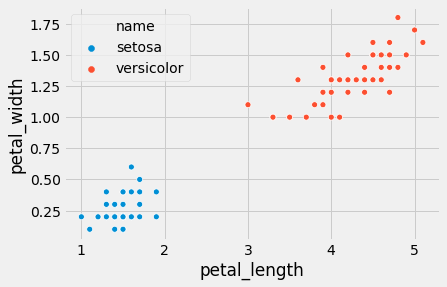

In [4]:
sns.scatterplot(data=iris_subset, x='petal_length', y='petal_width', hue='name')
plt.show()

### ML

In [5]:
X = iris_subset[['petal_length', 'petal_width']]
y = iris_subset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

#### LinearSVC Class 

In [6]:
lin_clf = Pipeline(
    [("scaler", StandardScaler()),
     ("svc", LinearSVC(C=1, loss="hinge", random_state=42))])

lin_clf.fit(X_train, y_train)

lin_clf_int = lin_clf.named_steps['svc'].intercept_[0]
lin_clf_coef = lin_clf.named_steps['svc'].coef_[0]

print(lin_clf_int, lin_clf_coef)

0.3434626274308408 [1.05434355 1.00645792]


#### SVM classifier - linear kernel 

In [7]:
svc_clf = Pipeline(
    [("scaler", StandardScaler()),
     ("svc", SVC(kernel='linear', C=1))])

svc_clf.fit(X_train, y_train)

svc_clf_int = svc_clf.named_steps['svc'].intercept_[0]
svc_clf_coef = svc_clf.named_steps['svc'].coef_[0]

print(svc_clf_int, svc_clf_coef)

0.380226646550169 [1.02082316 0.92950616]


#### SGDClassifier with a SVM

In [8]:
sgd_clf = Pipeline(
    [("scaler", StandardScaler()),
     ("svc", SGDClassifier(loss='hinge', max_iter=10000))])

sgd_clf.fit(X_train, y_train)

sgd_clf_int = sgd_clf.named_steps['svc'].intercept_[0]
sgd_clf_coef = sgd_clf.named_steps['svc'].coef_[0]

print(sgd_clf_int, sgd_clf_coef)

0.3883541866158204 [1.11377037 1.00282076]


#### Comparison

In [9]:
print('LinearSVC:')
print('  intercept = {0:.4f}, coefficients = {1:.4f}, {2:.4f}'
      .format(lin_clf_int, lin_clf_coef[0], lin_clf_coef[1]))
print()

print('SVC class:')
print('  intercept = {0:.4f}, coefficients = {1:.4f}, {2:.4f}'
      .format(svc_clf_int, svc_clf_coef[0], svc_clf_coef[1]))
print()

print('SGD SVC:')
print('  intercept = {0:.4f}, coefficients = {1:.4f}, {2:.4f}'
      .format(sgd_clf_int, sgd_clf_coef[0], sgd_clf_coef[1]))
print()

LinearSVC:
  intercept = 0.3435, coefficients = 1.0543, 1.0065

SVC class:
  intercept = 0.3802, coefficients = 1.0208, 0.9295

SGD SVC:
  intercept = 0.3884, coefficients = 1.1138, 1.0028



In [10]:
def fit_line(pipe):
    ''' Takes a clf pipeline with scaler and SVC. Returns a line plotting 
        decision function to the original dimensions'''
    
    clf = pipe.named_steps['svc']
    scaler = pipe.named_steps['scaler']
    
    w = -clf.coef_[0, 0] / clf.coef_[0, 1]
    b = -clf.intercept_[0] / clf.coef_[0, 1]
    line = scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])
    
    return line

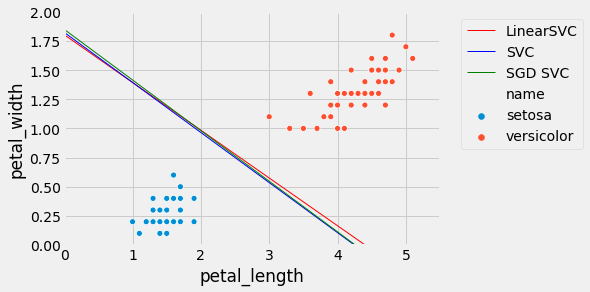

In [11]:
sns.scatterplot(data=iris_subset, x='petal_length', y='petal_width', hue='name')

line1 = fit_line(lin_clf) 
plt.plot(line1[:, 0], line1[:, 1], color='red', lw=1, label="LinearSVC")

line2 = fit_line(svc_clf) 
plt.plot(line2[:, 0], line2[:, 1], color='blue', lw=1, label="SVC")

line3 = fit_line(sgd_clf) 
plt.plot(line3[:, 0], line3[:, 1], color='green', lw=1, label="SGD SVC")

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))

plt.axis([0, 5.5, 0, 2])
plt.show()